<a href="https://colab.research.google.com/github/joezerr/Project/blob/main/Logistic_regression%2C_Gaussian_Naive_Bayes%2C_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NICHOLAS - 2440010334

JOSEPH ADIEL EBENEZER - 2440057672

AUDIA MAHARANI - 2440045161

#IMPORT THE LIBRARY

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Import Dataset and process it

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/joezerr/quiz/main/Mark.txt')
df.head()

,test_1,test_2,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   test_1  100 non-null    float64
 1   test_2  100 non-null    float64
 2   result  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
df.describe()

,test_1,test_2,result
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [ ]:
X= df.iloc[: , :-1].values
y= df.iloc [: , -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

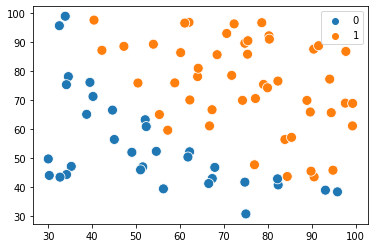

In [ ]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, s=100)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

#Logistic Regression GD

In [ ]:
def predict(x,theta,b):

  return np.array([1 / (1 + exp( -1*b + -1*np.dot(x,theta) )) ])
  pass

In [ ]:
class LogisticRegression:

  def __init__(self,iteration,alpha):
    self.alpha=alpha
    self.iteration=iteration
    self.theta=None
    self.bias = None
  
  def fit(self,x,y):
    n_samples, n_features = x.shape
    self.theta= np.zeros(n_features)
    self.bias=0
    for _ in range(self.iteration):  

      linear_model= np.dot(x, self.theta) + self.bias
      y_pred=self._sigmoid(linear_model)
      dw = (2/n_samples) * np.dot ( x.T, (y_pred - y))
      db = (2/n_samples) * np.sum(y_pred-y)

      self.theta-= dw*self.alpha
      self.bias-= db*self.alpha


  def _sigmoid( self, x):
    return 1/ (1+ np.exp(-x))

  
  def predict (self,x):
    linear_model= np.dot(x, self.theta) + self.bias
    y_pred=self._sigmoid(linear_model)
    y_pred_cls = [1 if i >= 0.5 else 0 for i in y_pred]
    return y_pred_cls
  
  def getParameter(self):
    print(self.theta)
    print(self.bias)

In [ ]:
regression = LogisticRegression(90000, 0.02)
regression.fit(X_train, y_train)
predictionTrain = regression.predict(X_train)

In [ ]:
def accuracy(y, y_pred):
  accuracy = np.sum(y==y_pred)/ len(y)
  return accuracy

In [ ]:
accuracy(y_train,predictionTrain)

0.9125

In [ ]:
predictionTest= regression.predict(X_test)
accuracy(y_test,predictionTest)

0.8

#NAIVE BAYES from scratch


In [ ]:
class BayesianClassifier:

  def fit(self, x,y):
    n_samples, n_features = x.shape
    self._classes= np.unique(y)
    n_classes= self._classes.shape[0]

    self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
    self._var = np.zeros((n_classes, n_features), dtype=np.float64)
    self._priors = np.zeros(n_classes, dtype=np.float64)

    for c in self._classes:
      x_c= x[c==y]
      self._mean[c , :]= x_c.mean(axis=0)
      self._var[c , :]= x_c.var(axis=0)
      self._priors[c]= x_c.shape[0] / float(n_samples)
    pass
  
  def predict (self, x):
    y_pred = [self._predict(a) for a in x]
    return y_pred

  def _predict(self,x):
    posteriors = []

    for idx, c in enumerate(self._classes):
      prior= np.log(self._priors[idx])
      class_conditional = np.sum(np.log(self._probabilityDensitty(idx,x)))
      posterior = prior +class_conditional
      posteriors.append ( posterior)
    
    return self._classes[np.argmax(posteriors)]


  def _probabilityDensitty(self,class_idx, x):
    mean = self._mean[class_idx]
    var = self._var[class_idx]
    numerator = np.exp(- (x-mean)**2 / (2*var))
    denominator = np.sqrt( 2 * np.pi * var  )
    return numerator/denominator

In [ ]:
np1= BayesianClassifier()
np1.fit(X_train,y_train)

In [ ]:
y_predBayesianTrain=np1.predict(X_train)
y_predBayesianTest= np1.predict(X_test)

In [ ]:
def score(pred,groundtruth):
  right=0
  wrong=0
  for i in range(len(pred)):
    if(pred[i]==groundtruth[i]):
      right= right+1
    else :wrong= wrong +1

  print(right/(right+wrong))


In [ ]:
score(y_predBayesianTrain, y_train)  #skor training

0.9375


In [ ]:
score(y_predBayesianTest, y_test) #skor testing

0.8


#sklearn Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()

In [ ]:
gnb.fit(X_train, y= y_train)

 gnbSklearnPredict= gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"       
      % (X_test.shape[0], (y_test != gnbSklearnPredict).sum()))

Number of mislabeled points out of a total 20 points : 4


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(gnbSklearnPredict, y_test))
print(accuracy_score(gnbSklearnPredict, y_test))

[[8 4]
 [0 8]]
0.8


#**Untuk testing, baik GNB manual, sklearn ataupun Logistic regression sama-sama mendapatkan skor 0.8**